In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [80]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [81]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [82]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [83]:
df = pd.merge(df_customers, df_loans, on="cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [84]:
df = pd.merge(df, df_bureau)
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [86]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [87]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58


In [88]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [89]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [90]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [91]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [92]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [93]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [94]:
df_train['residence_type'].fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [95]:
df_test['residence_type'].fillna(mode_residence, inplace=True)

In [96]:
df_train.duplicated().sum()

0

In [97]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [98]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

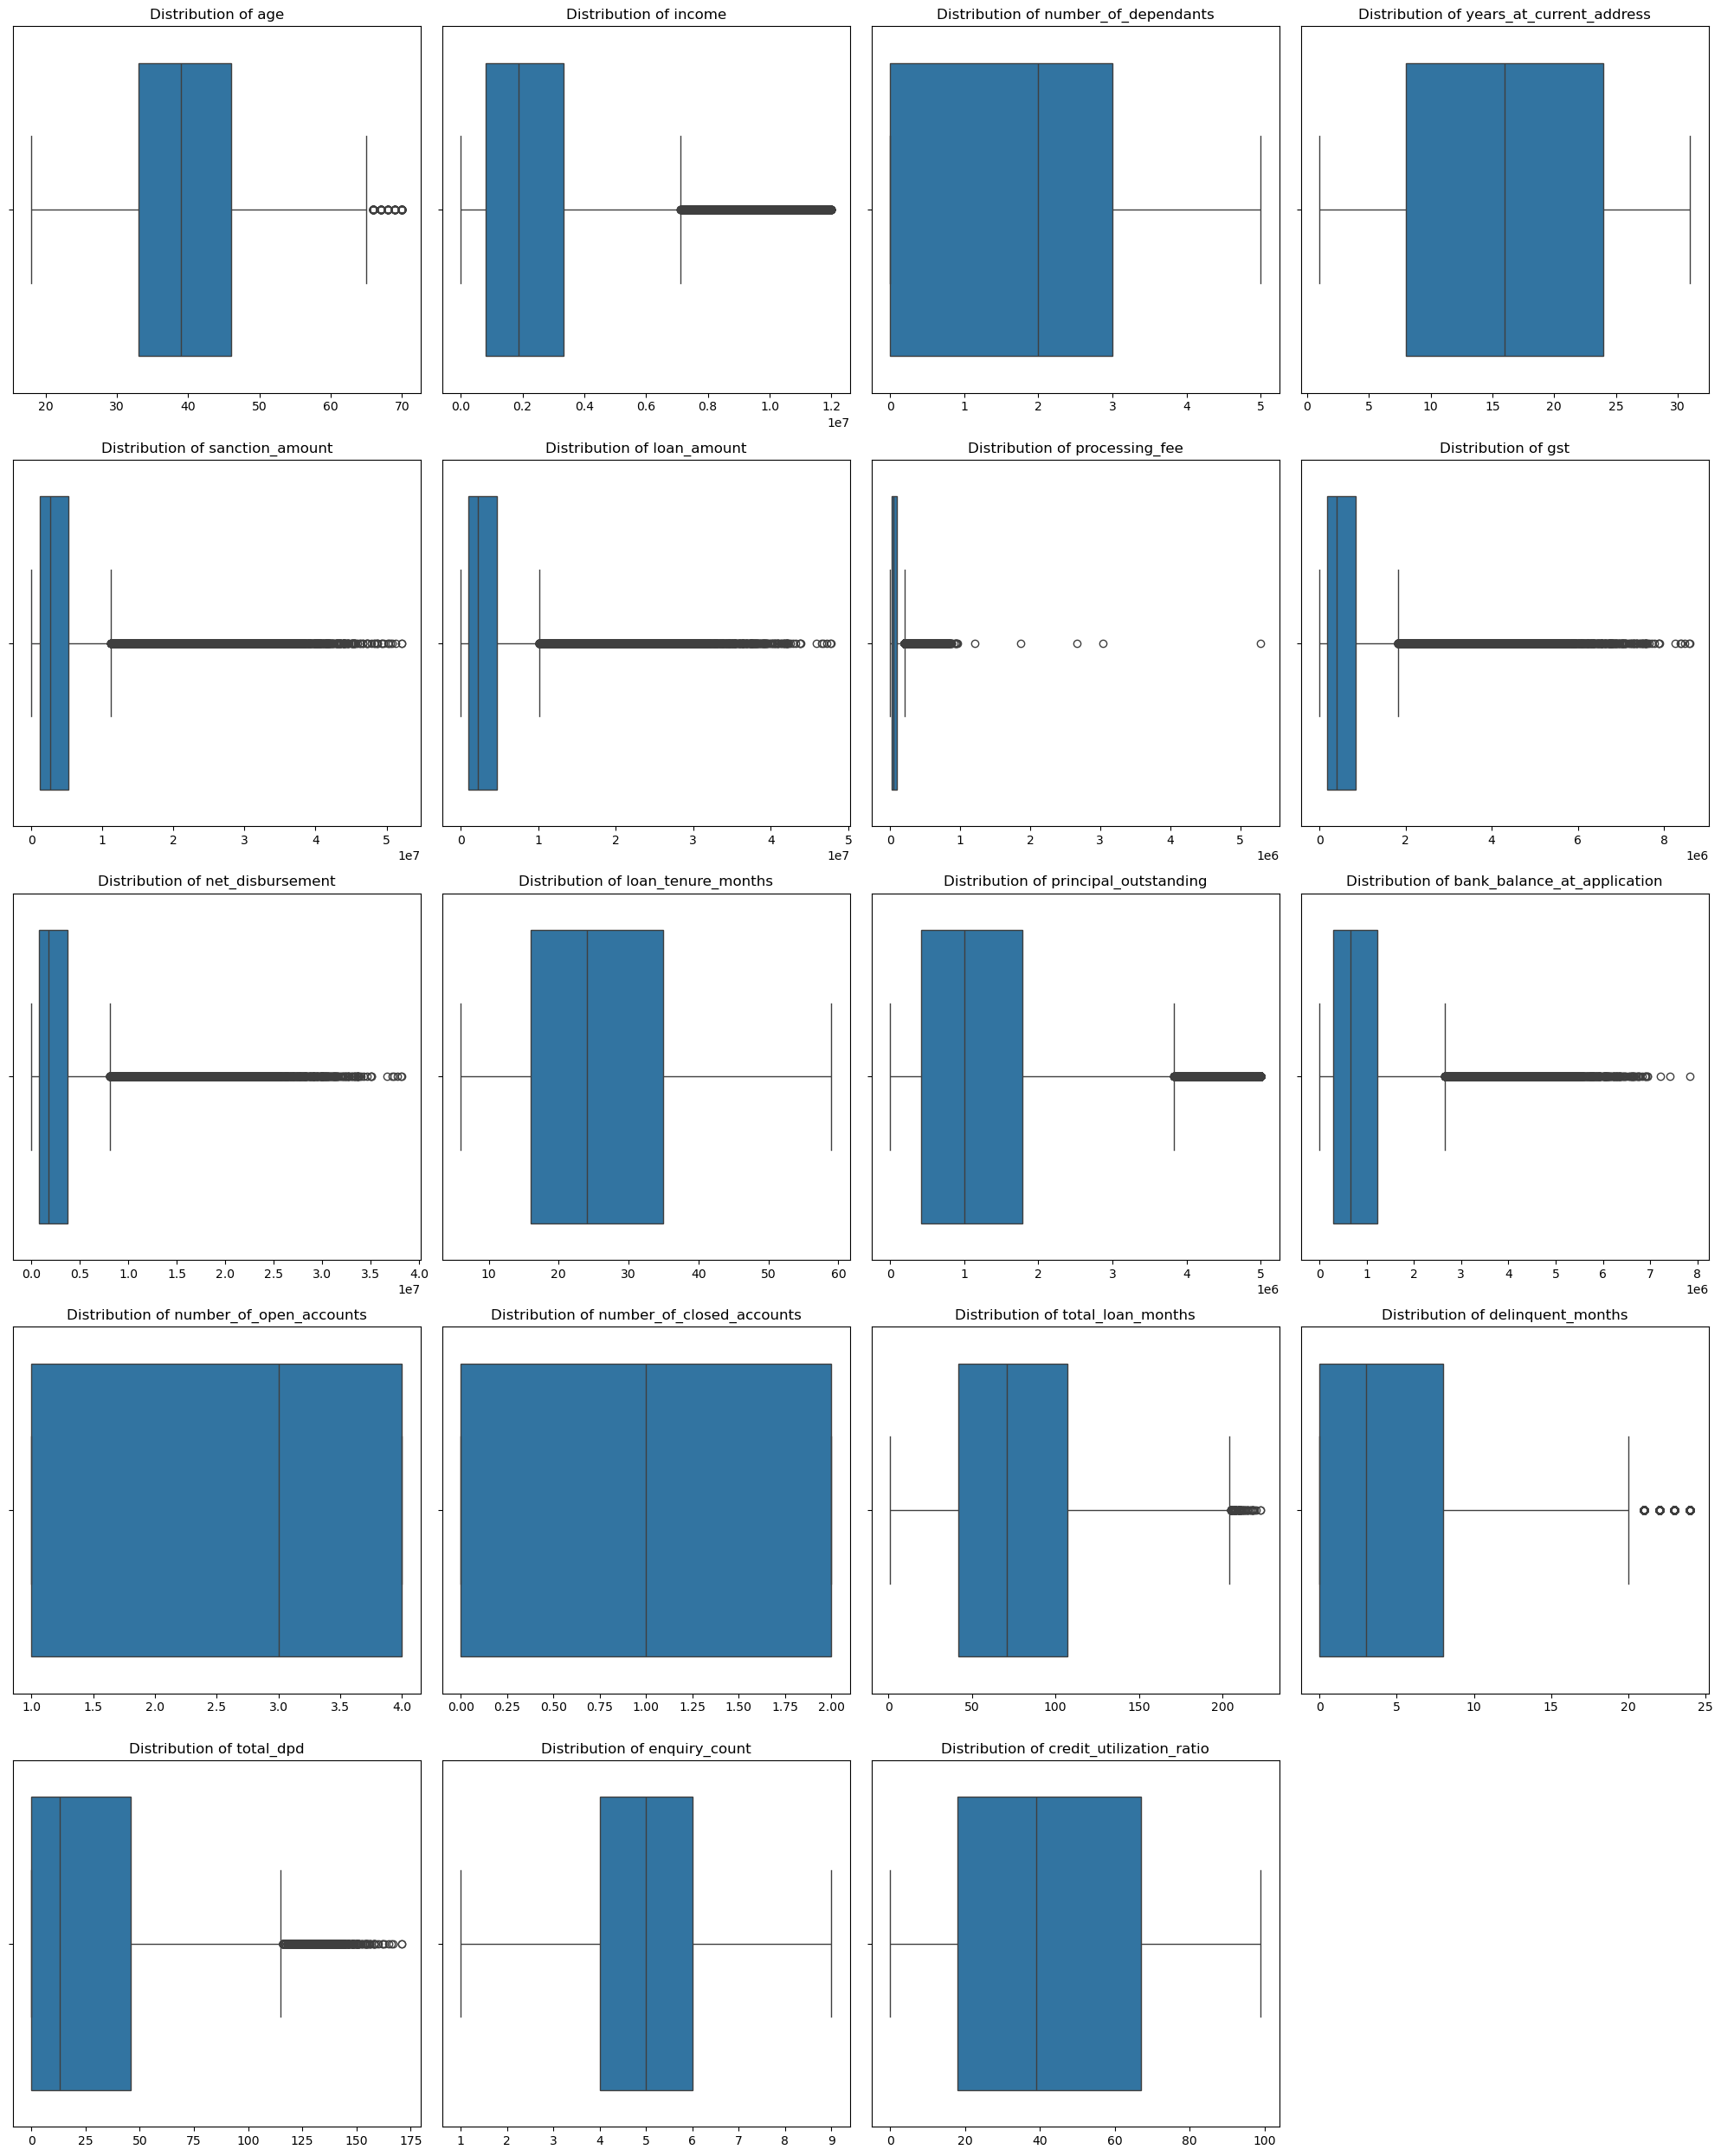

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import math # 我们需要它来计算需要多少行

# 假设 df_train 和 columns_continuous 已经定义好了
# df_train = ...
# columns_continuous = ['age', 'income', ..., 'credit_utilization_ratio']

# --- 1. 定义布局参数 ---
# 你想要每行放几个图？
COLS_PER_ROW = 4
# 计算总共有多少个图需要画
num_plots = len(columns_continuous)
# 动态计算需要多少行才能放下所有的图
# math.ceil()是“向上取整”，比如有9个图，9/4=2.25，向上取整就是3行
NUM_ROWS = math.ceil(num_plots / COLS_PER_ROW)

# --- 2. 创建子图网格 (布置“照片墙”) ---
# 我们动态地传入计算好的行数和列数
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=COLS_PER_ROW, figsize=(20, 5 * NUM_ROWS))

# --- 3. 循环挂画 (核心逻辑) ---
for i, col in enumerate(columns_continuous):
    # 使用我们熟悉的数学魔法，计算当前图应该放在第几行第几列
    row = i // COLS_PER_ROW
    col_idx = i % COLS_PER_ROW
    
    # 获取当前要操作的“画框”(ax)
    # 如果只有一行，axs是一维的，否则是二维的，这里做一个判断更稳健
    ax = axs[row, col_idx] if NUM_ROWS > 1 else axs[col_idx]
    
    # 在这个指定的画框里画图
    sns.boxplot(x=df_train[col], ax=ax) # 注意这里用x=...来画横向的箱形图，更节省垂直空间
    
    # 给每个小图加上标题
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('') # 可以把x轴标签去掉，让图更简洁

# --- 4. 清理多余的“空画框” ---
# 计算总共的画框数量
total_subplots = NUM_ROWS * COLS_PER_ROW
# 从最后一个画完的图的下一个位置开始，隐藏所有多余的画框
for j in range(num_plots, total_subplots):
    row = j // COLS_PER_ROW
    col_idx = j % COLS_PER_ROW
    ax = axs[row, col_idx] if NUM_ROWS > 1 else axs[col_idx]
    ax.set_visible(False)

# --- 5. 整理并展示 ---
plt.tight_layout()
plt.show()

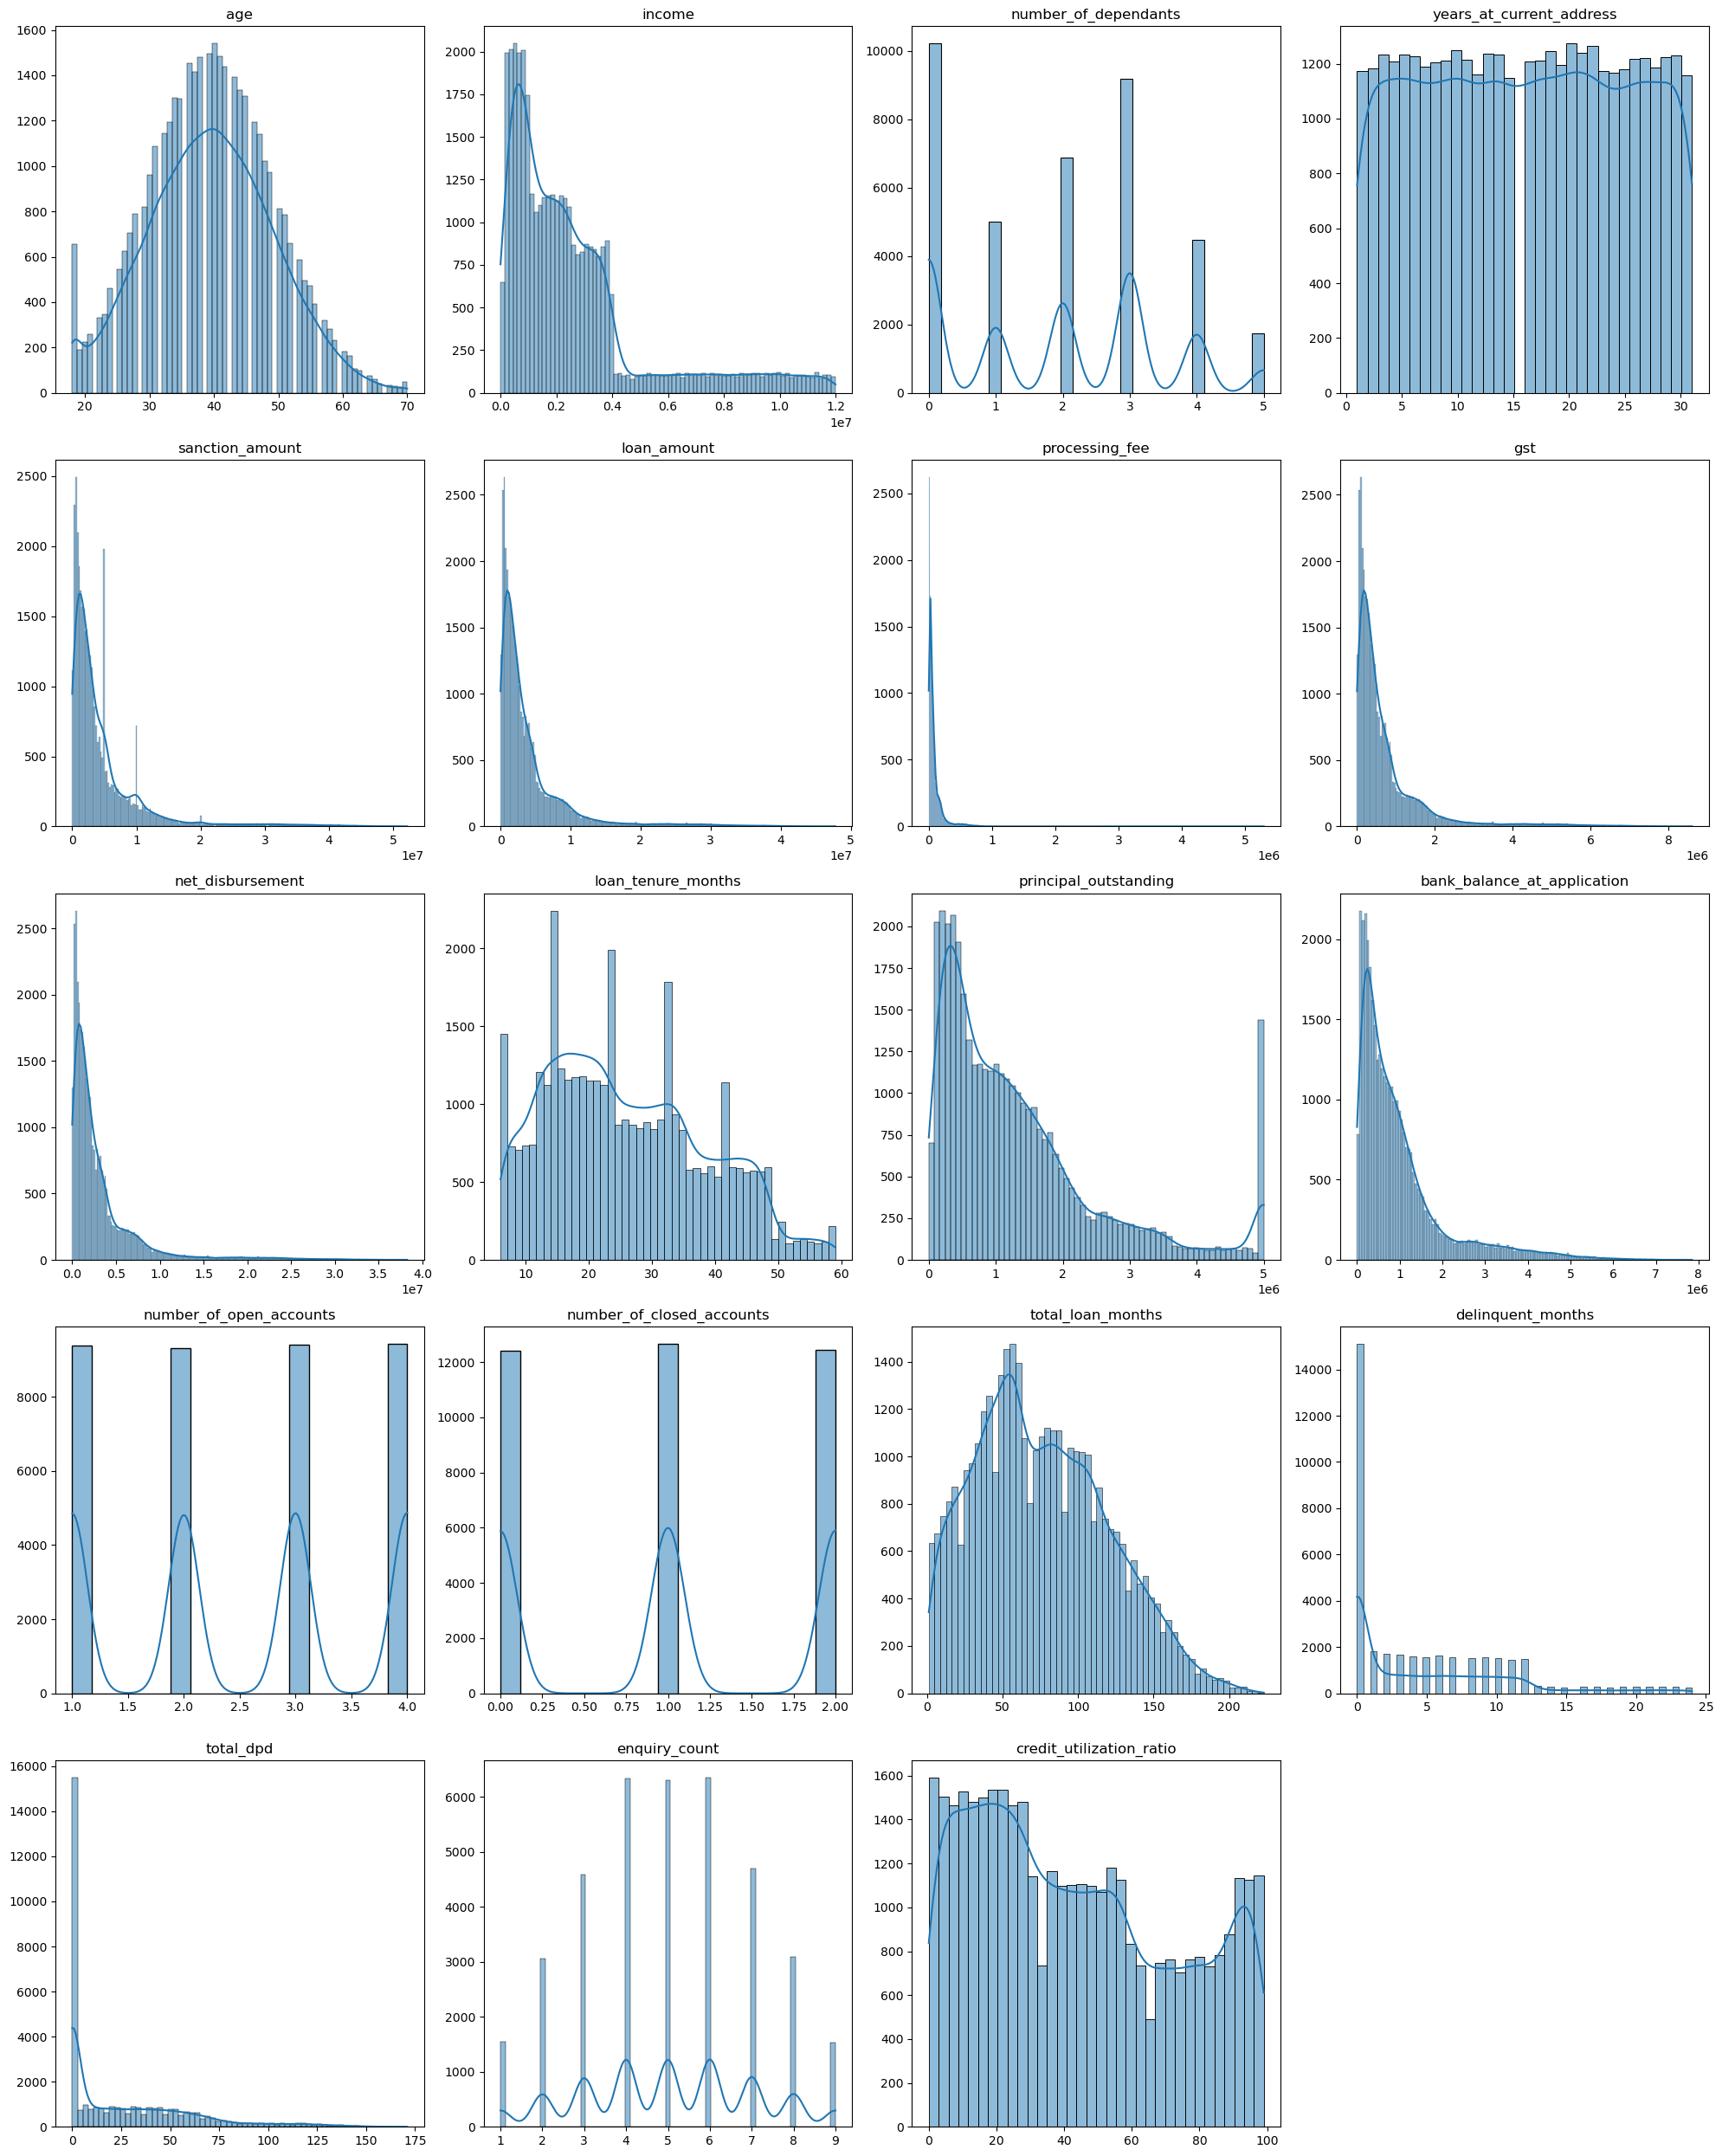

In [100]:
COLS_PER_ROW = 4
num_plots = len(columns_continuous)
NUM_ROWS = math.ceil(num_plots / COLS_PER_ROW)

fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=COLS_PER_ROW, figsize=(20, 5 * NUM_ROWS))
axs = axs.flatten()

for i, col in enumerate(columns_continuous):
    ax = axs[i]
    sns.histplot(data=df_train, x=col, kde=True, ax=ax)
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

total_subplots = NUM_ROWS * COLS_PER_ROW
for j in range(num_plots, total_subplots):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

In [101]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [102]:
df_train[df_train.processing_fee/df_train.loan_amount>0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [103]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()

In [104]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()

In [105]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [106]:
for col in columns_categorical:
    print(col,"-->" ,df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [107]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

### Exploratory Data Analysis

In [109]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

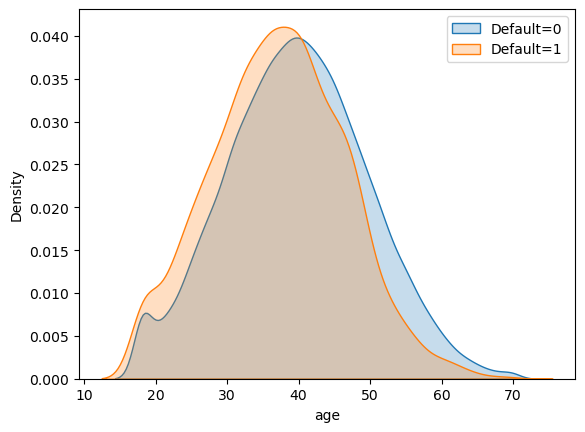

In [110]:
sns.kdeplot(df_train_1[df_train_1.default==0]["age"], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["age"], fill=True, label="Default=1")
plt.legend()
plt.show()

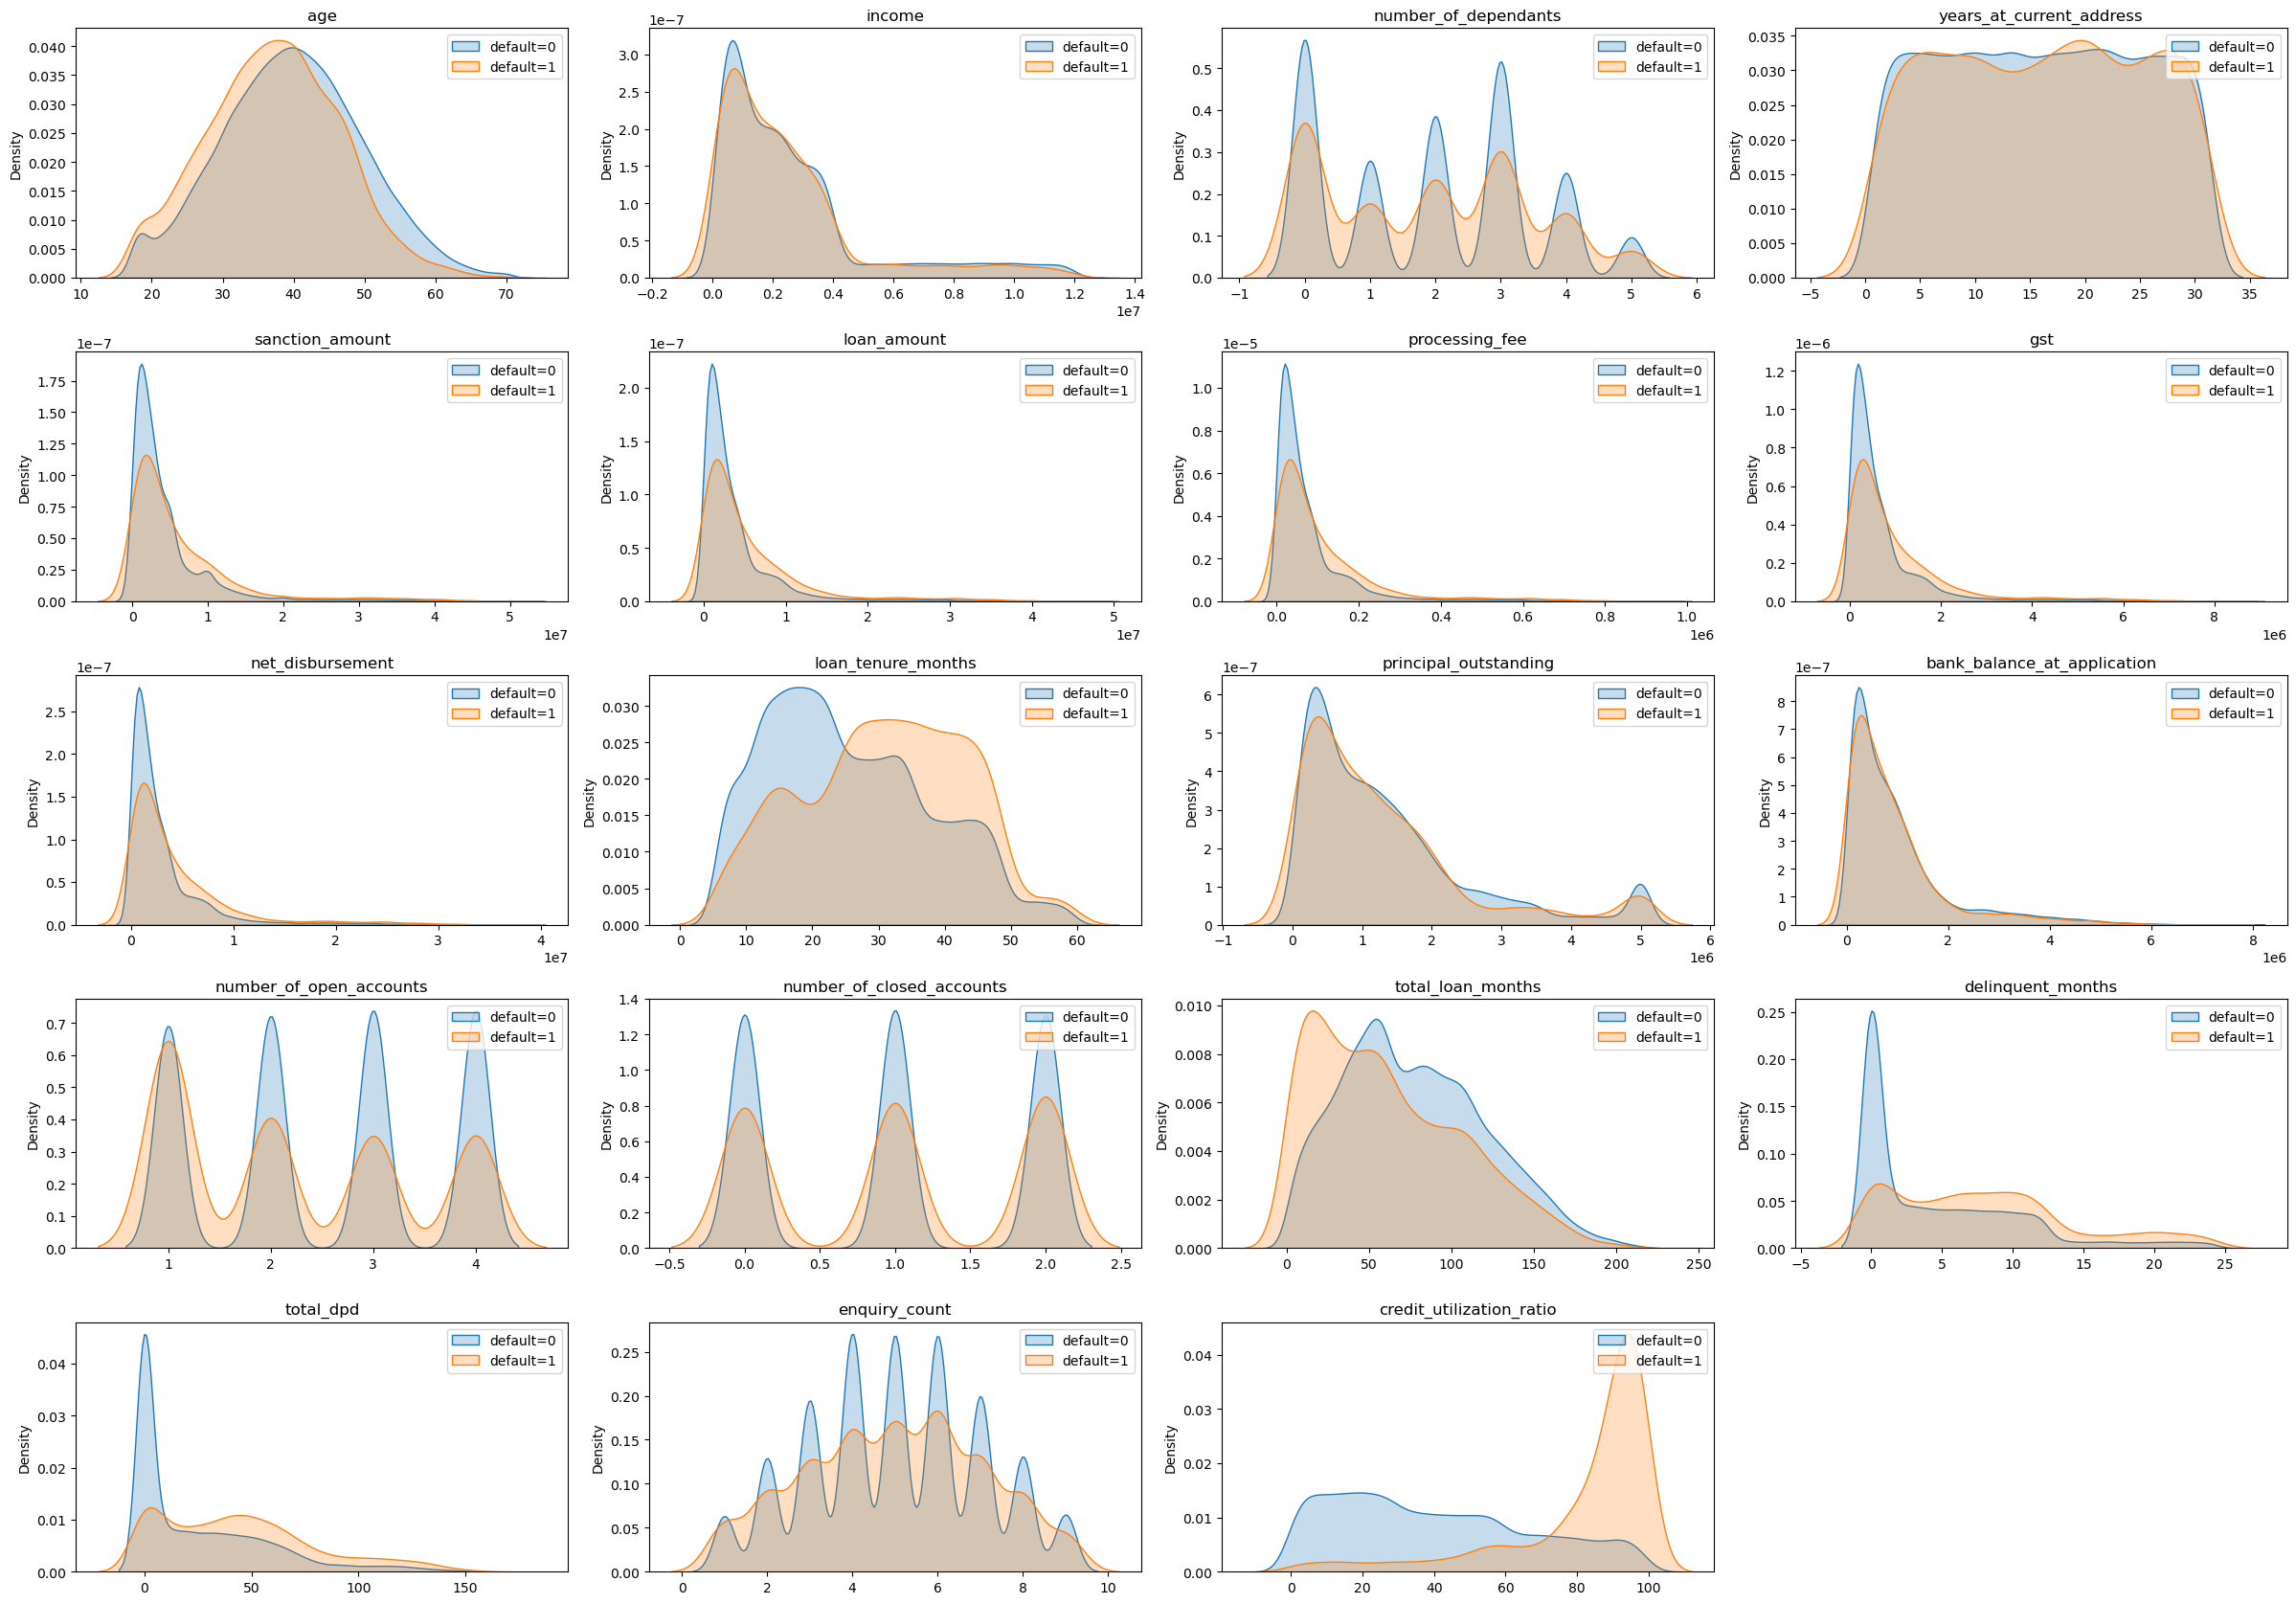

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 20))

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i + 1)
    sns.kdeplot(
        df_train_1[col][df_train_1['default'] == 0], 
        fill=True, 
        label='default=0'
    )
    sns.kdeplot(
        df_train_1[col][df_train_1['default'] == 1], 
        fill=True, 
        label='default=1'
    )
    plt.legend()
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Feature Engineering

In [113]:
# 计算一个新的特征：贷款金额占收入的比例
df_train_1["loan_to_income"] = round((df_train_1["loan_amount"] / df_train_1["income"]), 2)
df_test["loan_to_income"] = round((df_test["loan_amount"] / df_test["income"]), 2)

In [114]:
df_train_1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

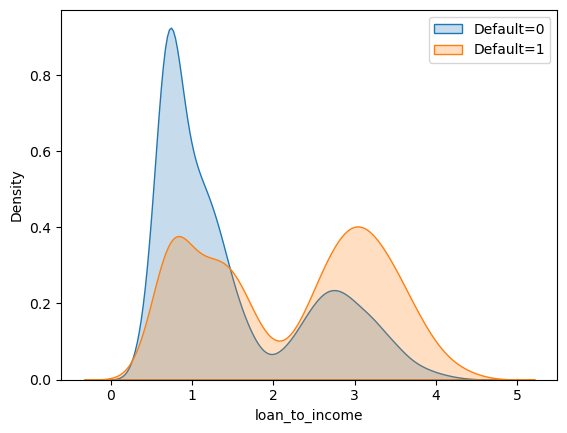

In [115]:
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"], fill=True, label="Default=1")
plt.legend()
plt.show()

In [116]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [117]:
df_train_1[["delinquent_months", "total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [118]:
df_train_1['delinquent_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(2)
df_test['delinquent_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(2)
df_train_1[["delinquent_months", "total_loan_months",'delinquent_ratio']]

,delinquent_months,total_loan_months,delinquent_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00
13077,0,60,0.00
...,...,...,...
28515,0,40,0.00
5558,14,52,26.92
45236,11,130,8.46
49228,0,88,0.00


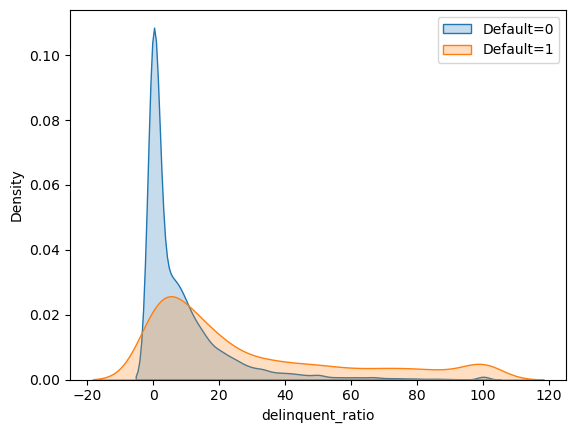

In [119]:
sns.kdeplot(df_train_1[df_train_1.default==0]["delinquent_ratio"], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["delinquent_ratio"], fill=True, label="Default=1")
plt.legend()
plt.show()

In [120]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months']!=0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

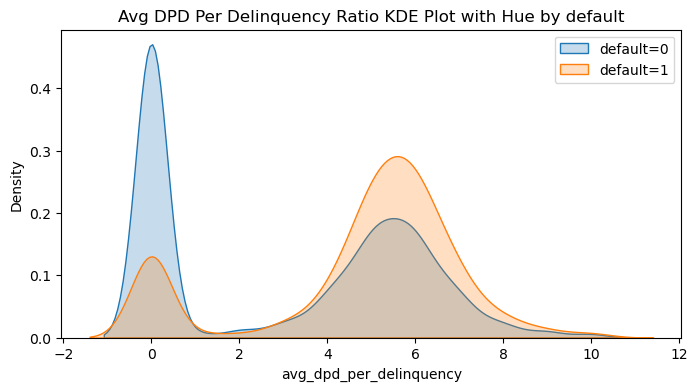

In [121]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [122]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [123]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)

In [124]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [125]:
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [126]:
X_train = df_train_3.drop("default", axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [127]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [129]:
calculate_vif(X_train[cols_to_scale])

G:\Anaconda3\envs\DL_env2\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [130]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [131]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [132]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'], dtype=object)

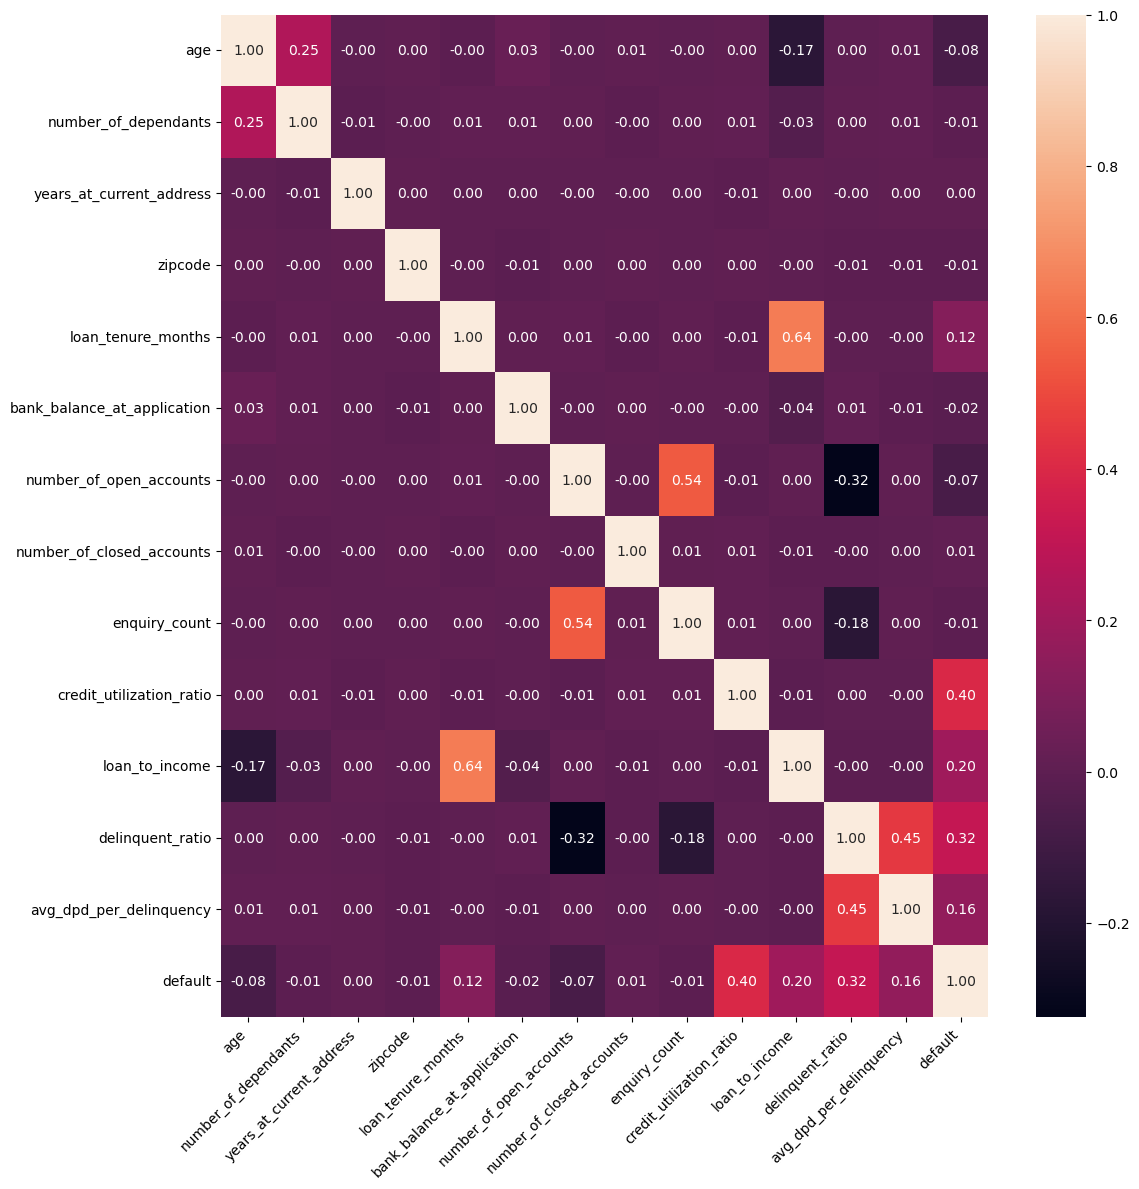

In [133]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [134]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [135]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [136]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [156]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquent_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40151905412190175}

In [157]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', "IV"])
iv_df = iv_df.sort_values(by="IV", ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquent_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_delinquency,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [158]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_delinquency']

In [159]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [160]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
12746,0.79,Owned,Home,Secured,0.42,1.00,0.36,0.41,0.13,0.59
32495,0.50,Owned,Education,Secured,0.83,0.67,0.05,0.31,0.06,0.62
43675,0.38,Mortgage,Home,Secured,0.49,0.00,0.00,0.76,0.22,0.56
9040,0.46,Mortgage,Education,Secured,0.64,0.67,0.88,0.19,0.00,0.00
13077,0.77,Owned,Personal,Unsecured,0.17,0.00,0.72,0.05,0.00,0.00


In [161]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded =  pd.get_dummies(X_test_reduced, drop_first=True)

In [162]:
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.79,0.42,1.00,0.36,0.41,0.13,0.59,True,False,False,True,False,False
32495,0.50,0.83,0.67,0.05,0.31,0.06,0.62,True,False,True,False,False,False
43675,0.38,0.49,0.00,0.00,0.76,0.22,0.56,False,False,False,True,False,False


### MODEL TRAIN

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.84      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [165]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [166]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.77      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.88      0.89     12497
weighted avg       0.96      0.97      0.96     12497



In [167]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': 545.5594781168514}
Best Score: 0.7578820896729831
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [168]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7892361105219333
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.84      0.81      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.97      0.97     12497



In [169]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [170]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

In [171]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [172]:
model = XGBClassifier()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.74      0.84      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [186]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [188]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-11-01 18:49:36,047] A new study created in memory with name: no-name-39187040-a3dc-43b3-9a98-9b1319a0958e
[I 2025-11-01 18:49:36,309] Trial 0 finished with value: 0.9457796234213968 and parameters: {'C': 9.560084737508328, 'solver': 'saga', 'tol': 6.546515332410707e-06, 'class_weight': None}. Best is trial 0 with value: 0.9457796234213968.
[I 2025-11-01 18:49:36,378] Trial 1 finished with value: 0.87024309950288 and parameters: {'C': 0.000383308461789924, 'solver': 'lbfgs', 'tol': 0.021515312842080973, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9457796234213968.
[I 2025-11-01 18:49:36,511] Trial 2 finished with value: 0.9107718406980148 and parameters: {'C': 0.0014766540923178816, 'solver': 'saga', 'tol': 0.0002209606406062446, 'class_weight': None}. Best is trial 0 with value: 0.9457796234213968.
[I 2025-11-01 18:49:36,628] Trial 3 finished with value: 0.9392662785747944 and parameters: {'C': 0.09837911664483258, 'solver': 'liblinear', 'tol': 2.226523041651063e

In [190]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458958030557655
  Params: 
    C: 3.3320443454714446
    solver: saga
    tol: 0.00015630137519278227
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [192]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-11-01 18:49:55,742] A new study created in memory with name: no-name-fb87fa08-0e8e-4ab4-abaf-3b6fc6a613c6
[I 2025-11-01 18:49:56,280] Trial 0 finished with value: 0.9628856060435086 and parameters: {'lambda': 0.011597987011960794, 'alpha': 5.456188090648842, 'subsample': 0.5025261606999547, 'colsample_bytree': 0.6305599431460356, 'max_depth': 9, 'eta': 0.17330951693194838, 'gamma': 4.375628211469971, 'scale_pos_weight': 9.770563087287199, 'min_child_weight': 7, 'max_delta_step': 5}. Best is trial 0 with value: 0.9628856060435086.
[I 2025-11-01 18:49:56,782] Trial 1 finished with value: 0.9629017755088705 and parameters: {'lambda': 0.006515311400983988, 'alpha': 3.888160569546186, 'subsample': 0.6231282596748884, 'colsample_bytree': 0.6215262640258875, 'max_depth': 8, 'eta': 0.11555625297174715, 'gamma': 3.621068357223426, 'scale_pos_weight': 6.29068367404108, 'min_child_weight': 4, 'max_delta_step': 7}. Best is trial 1 with value: 0.9629017755088705.
[I 2025-11-01 18:49:57,322]

In [194]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.974138147226042
  Params: 
    lambda: 0.0016013484044324973
    alpha: 0.4998480876883182
    subsample: 0.8650875891412022
    colsample_bytree: 0.8206216044728161
    max_depth: 10
    eta: 0.1957634472778541
    gamma: 2.962616028187415
    scale_pos_weight: 2.4552365994748904
    min_child_weight: 3
    max_delta_step: 3
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.68      0.89      0.77      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.93      0.87     12497
weighted avg       0.96      0.95      0.96     12497



In [196]:
best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.68      0.89      0.77      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.93      0.87     12497
weighted avg       0.96      0.95      0.96     12497



In [204]:
from sklearn.metrics import roc_curve, auc
probailities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, threshold = roc_curve(y_test, probailities)

In [206]:
area = auc(fpr, tpr)

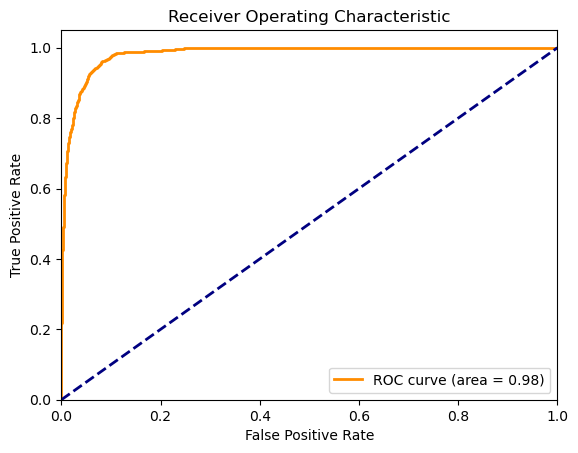

In [208]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [224]:
probailities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability':probailities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.53
15514,0,0.00
30367,0,0.01


In [226]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.53,8
15514,0,0.00,2
30367,0,0.01,6


In [228]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1249.00
3,3,0.00,0.00,0.00,1250.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.00,0.00,1249.00
6,6,0.00,0.03,5.00,1245.00
7,7,0.03,0.21,11.00,1238.00
8,8,0.21,0.82,160.00,1090.00
9,9,0.82,1.00,898.00,352.00


In [230]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.00,0.00,0.00,1250.00,0.00,100.00
1,1,0.00,0.00,0.00,1250.00,0.00,100.00
2,2,0.00,0.00,0.00,1249.00,0.00,100.00
3,3,0.00,0.00,0.00,1250.00,0.00,100.00
4,4,0.00,0.00,0.00,1250.00,0.00,100.00
5,5,0.00,0.00,0.00,1249.00,0.00,100.00
6,6,0.00,0.03,5.00,1245.00,0.40,99.60
7,7,0.03,0.21,11.00,1238.00,0.88,99.12
8,8,0.21,0.82,160.00,1090.00,12.80,87.20
9,9,0.82,1.00,898.00,352.00,71.84,28.16


In [232]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16
1,8,0.21,0.82,160.00,1090.00,12.80,87.20
2,7,0.03,0.21,11.00,1238.00,0.88,99.12
3,6,0.00,0.03,5.00,1245.00,0.40,99.60
4,5,0.00,0.00,0.00,1249.00,0.00,100.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00


In [234]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00
1,8,0.21,0.82,160.00,1090.00,12.80,87.20,1058.00,1442.00
2,7,0.03,0.21,11.00,1238.00,0.88,99.12,1069.00,2680.00
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00


In [236]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08
1,8,0.21,0.82,160.00,1090.00,12.80,87.20,1058.00,1442.00,98.51,12.62
2,7,0.03,0.21,11.00,1238.00,0.88,99.12,1069.00,2680.00,99.53,23.46
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00


In [238]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08,80.53
1,8,0.21,0.82,160.00,1090.00,12.80,87.20,1058.00,1442.00,98.51,12.62,85.89
2,7,0.03,0.21,11.00,1238.00,0.88,99.12,1069.00,2680.00,99.53,23.46,76.07
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36,65.64
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29,54.71
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24,43.76
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18,32.82
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11,21.89
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06,10.94
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00,0.00


In [240]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [246]:
from joblib import dump
final_model = best_model_logistic
model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']